# Table of Contents
   1. Business Statement   
      1.1 About Data Set
   2. Introduction 
   3. Installing Libraries 
   4. Reading Data Set
   5. Machine Learning Models 
   6. Summary

# 1. Business Statement 

## 1.1 Car Insurance Claim
Dataset Shape: 418 rows x 20 columns

1. age: It is the age group of people
2. workclass: It is the working class of people
3. fnlwgt: 
4. education: The education level of the person
5. education-num: Number of education of the person
6. marital-status: If the person is married/unmarried/divorced etc.
7. occupation: ocupation of the person
8. relationship: realtionship with the people
9. race: If the person is black or white
10. sex: Sex of the person M/F
11. capital-gain: How much is the gain
12. capital-loss: How much is the loss
13. hours-per-week: How much hours weekly the person works
14. native-country: Native country of the person
15. income: Income above 50k or below




Columns Types:
1. Continuous: 6
 
2. Categorical: 9

# Importing Important Dependencies 

In [33]:
!pip install yellowbrick

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd
import warnings
warnings.filterwarnings("ignore")

# Reading Data Set

In [35]:
df = pd.read_csv('income_evaluation.csv')

In [36]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [37]:
df.shape

(32561, 15)

In [38]:
df.nunique()

age                   73
 workclass             9
 fnlwgt            21648
 education            16
 education-num        16
 marital-status        7
 occupation           15
 relationship          6
 race                  5
 sex                   2
 capital-gain        119
 capital-loss         92
 hours-per-week       94
 native-country       42
 income                2
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [40]:
sum(df.duplicated())

24

In [41]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [42]:
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [43]:
df.isnull().sum()/df.shape[0]*100

age                0.0
 workclass         0.0
 fnlwgt            0.0
 education         0.0
 education-num     0.0
 marital-status    0.0
 occupation        0.0
 relationship      0.0
 race              0.0
 sex               0.0
 capital-gain      0.0
 capital-loss      0.0
 hours-per-week    0.0
 native-country    0.0
 income            0.0
dtype: float64

In [44]:
df.select_dtypes(include=(['int64', 'float64'])).isna().sum()
df_num_col = df.select_dtypes(include=(['int64', 'float64'])).columns
for c in df_num_col:
    df[c].fillna(df[c].median(), inplace=True)

df.select_dtypes(include=(['int64', 'float64'])).isna().sum()

age                0
 fnlwgt            0
 education-num     0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
dtype: int64

In [45]:
df.select_dtypes(include=('object')).isna().sum()
df_cat_col = df.select_dtypes(include=('object')).columns
for c in df_cat_col:
    df[c].fillna(df[c].mode().values[0], inplace=True)
    
df.select_dtypes(include=('object')).isna().sum()

 workclass         0
 education         0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 native-country    0
 income            0
dtype: int64

In [46]:
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [47]:
X = df.drop(' income', axis=1)
y = df[' income']

In [48]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size = .3, random_state = 2022)

In [49]:
# Break X_train in to 2 parts: X_train_cat, X_train_cont, same w/ X_test
X_train_cat = X_train.select_dtypes(exclude='number')
X_train_cat

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
3192,Private,Some-college,Never-married,Other-service,Not-in-family,White,Female,United-States
15498,Local-gov,7th-8th,Never-married,Other-service,Unmarried,Black,Female,United-States
8060,Private,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
24514,Private,Prof-school,Divorced,Prof-specialty,Not-in-family,White,Male,United-States
25594,Private,11th,Never-married,Machine-op-inspct,Unmarried,White,Female,Nicaragua
...,...,...,...,...,...,...,...,...
14001,Private,Assoc-acdm,Married-civ-spouse,Adm-clerical,Husband,White,Male,United-States
4720,Self-emp-not-inc,HS-grad,Widowed,Other-service,Not-in-family,White,Female,United-States
16557,Private,Bachelors,Married-civ-spouse,Adm-clerical,Wife,White,Female,United-States
1244,Local-gov,Some-college,Never-married,Other-service,Not-in-family,White,Male,United-States


In [50]:
X_test_cat = X_test.select_dtypes(exclude='number')
X_test_cat

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
32241,State-gov,Bachelors,Divorced,Protective-serv,Not-in-family,White,Male,United-States
11420,Private,Some-college,Never-married,Sales,Own-child,White,Female,United-States
5623,?,5th-6th,Married-civ-spouse,?,Husband,Other,Male,United-States
21501,Private,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
32116,Private,10th,Married-civ-spouse,Adm-clerical,Husband,Black,Male,United-States
...,...,...,...,...,...,...,...,...
9863,Federal-gov,HS-grad,Married-civ-spouse,Adm-clerical,Husband,White,Male,United-States
3059,Private,HS-grad,Married-civ-spouse,Transport-moving,Husband,White,Male,United-States
20933,Private,10th,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,United-States
4252,Private,Some-college,Married-spouse-absent,Craft-repair,Not-in-family,White,Male,United-States


In [51]:
X_train_cont = X_train.select_dtypes(include='number')
X_train_cont

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
3192,71,157909,10,2964,0,60
15498,55,88856,4,0,0,40
8060,47,155659,9,0,0,60
24514,30,207937,15,10520,0,50
25594,28,111520,7,0,0,40
...,...,...,...,...,...,...
14001,42,325353,12,7688,0,42
4720,79,158319,9,0,0,24
16557,31,240283,13,0,0,40
1244,38,165799,10,0,0,12


In [52]:
X_test_cont = X_test.select_dtypes(include='number')
X_test_cont

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
32241,45,231013,13,0,0,40
11420,19,100009,10,0,0,15
5623,41,230020,3,0,0,40
21501,81,177408,9,0,2377,26
32116,56,134153,6,0,0,40
...,...,...,...,...,...,...
9863,51,160703,9,0,0,40
3059,40,164663,9,0,0,40
20933,59,340591,6,3942,0,40
4252,35,169104,10,0,0,40


In [53]:
from sklearn.preprocessing import OneHotEncoder

# Encoding on X_train_cat and X_test_cat
ohe = OneHotEncoder(drop = 'first')

X_train_cat_encoded = pd.DataFrame(ohe.fit_transform(X_train_cat).toarray(), columns = ohe.get_feature_names(list(X_train_cat.columns)))
X_test_cat_encoded = pd.DataFrame(ohe.transform(X_test_cat).toarray(), columns = ohe.get_feature_names(list(X_test_cat.columns)))

In [54]:
from sklearn.preprocessing import StandardScaler

# Scaling on X_train_cont and X_test_cont
sc = StandardScaler()

X_train_cont_scaled = pd.DataFrame(sc.fit_transform(X_train_cont), columns = X_train_cont.columns)
X_test_cont_scaled = pd.DataFrame(sc.transform(X_test_cont), columns = X_test_cont.columns)

In [55]:
X_train = pd.concat([X_train_cat_encoded, X_train_cont_scaled], axis = 1)
X_test = pd.concat([X_test_cat_encoded, X_test_cont_scaled], axis = 1)

In [56]:
colors= ["YlGnBu", "Blues", "BuPu", "Greens", "PiYG"]
rnd.choice(colors)

'PiYG'

# Machine Learning Models:

1. Logistic Regression
2. Decision Tree
3. Gaussian Naive Bayes
4. Random Forest
5. K-Nearest Neighbors
6. Support Vector Machine
7. Stochastic Gradient Descent
8. AdaBoost
9. Gradient Bossting 
# Metrics used: Accuracy Score, F-Beta Score, Classification Report, Confusion Matrix, ROCAUC Curve, Precision-Recall Curve

In [57]:
from sklearn.metrics import accuracy_score, fbeta_score
from sklearn import metrics
from yellowbrick.contrib.wrapper import wrap
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix, ROCAUC, PrecisionRecallCurve

# Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

#Created an obj for logistic regression 
log_reg = LogisticRegression(random_state = 10)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [59]:
#Training Accuracy
log_reg.score(X_train, y_train)

0.8536328536328537

In [60]:
#Testing Accuracy
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)
print(accuracy_score(y_test, y_test_pred))
print(accuracy_score(y_train, y_train_pred))

0.8516736615825571
0.8536328536328537


In [61]:
precision_positive = metrics.precision_score(y_test, y_test_pred, pos_label = ' <=50K')
precision_positive 

0.8797412152733731

In [62]:
precision_positive = metrics.precision_score(y_train, y_train_pred, pos_label=' <=50K')
precision_positive

0.8816351099923389

In [63]:
recall_specificity = metrics.recall_score(y_test, y_test_pred, pos_label=' <=50K')
recall_specificity

0.9326250672404519

In [64]:
recall_specificity = metrics.recall_score(y_train, y_train_pred, pos_label=' <=50K')
recall_specificity

0.932133765332099

In [65]:
fbeta_score(y_train, y_train_pred, beta = 1, average = None)

array([0.90618145, 0.66726511])

In [66]:
fbeta_score(y_test, y_test_pred, beta = 1, average = None)

array([0.90541158, 0.65655369])

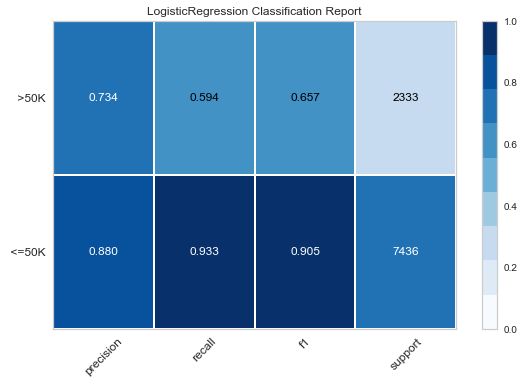

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [67]:
visualizer = ClassificationReport(log_reg, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

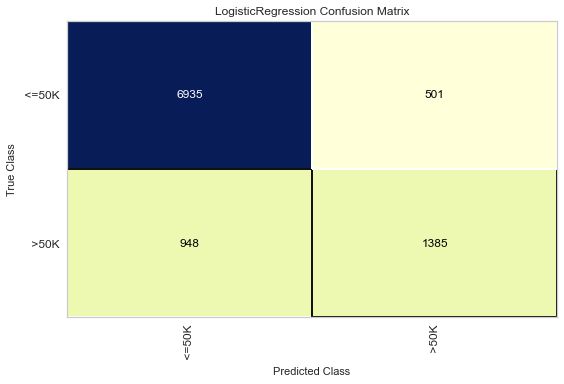

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [68]:
visualizer = ConfusionMatrix(log_reg, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show() 

# Decision Tree

In [69]:
from sklearn.tree import DecisionTreeClassifier

#Created an obj for Decision Tree 
dec_tree = DecisionTreeClassifier(max_depth = 25, min_samples_split = 5, random_state = 10)
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=25, min_samples_split=5, random_state=10)

In [70]:
#Training Accuracy
dec_tree.score(X_train, y_train)

0.9562127062127063

In [71]:
#Testing Accuracy
y_train_pred = dec_tree.predict(X_train)
y_test_pred = dec_tree.predict(X_test)
print(accuracy_score(y_test, y_test_pred))
print(accuracy_score(y_train, y_train_pred))

0.8258777766403931
0.9562127062127063


In [72]:
precision_positive = metrics.precision_score(y_test, y_test_pred, pos_label = ' <=50K')
precision_positive

0.8808606720680037

In [73]:
precision_positive = metrics.precision_score(y_train, y_train_pred, pos_label=' <=50K')
precision_positive

0.9628282368989428

In [74]:
recall_specificity = metrics.recall_score(y_test, y_test_pred, pos_label=' <=50K')
recall_specificity

0.891877353415815

In [75]:
recall_specificity = metrics.recall_score(y_train, y_train_pred, pos_label=' <=50K')
recall_specificity

0.9800971997222865

In [76]:
fbeta_score(y_train, y_train_pred, beta = 1, average = None)

array([0.97138597, 0.90678124])

In [77]:
fbeta_score(y_test, y_test_pred, beta = 1, average = None)

array([0.88633478, 0.62803411])

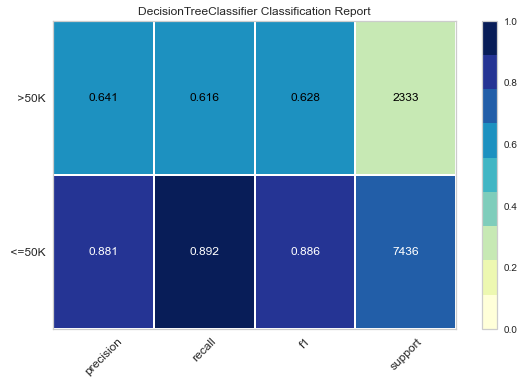

<AxesSubplot:title={'center':'DecisionTreeClassifier Classification Report'}>

In [78]:
visualizer = ClassificationReport(dec_tree, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

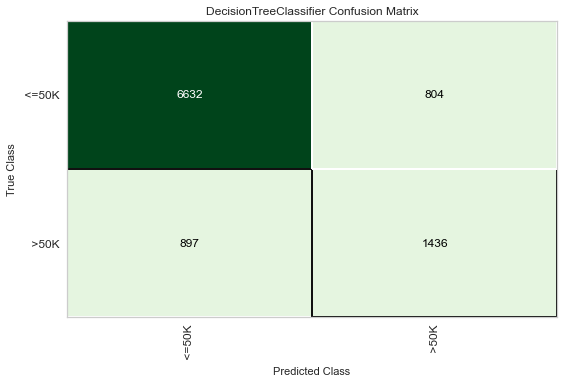

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [79]:
visualizer = ConfusionMatrix(dec_tree, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show() 

# Gaussian Naive Bayes

In [80]:
from sklearn.naive_bayes import GaussianNB

#Created an obj for Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [81]:
#Training Accuracy
gnb.score(X_train, y_train)

0.5317655317655318

In [82]:
#Testing Accuracy
y_train_pred = gnb.predict(X_train)
y_test_pred = gnb.predict(X_test)
print(accuracy_score(y_test, y_test_pred))
print(accuracy_score(y_train, y_train_pred))

0.5214453884737434
0.5317655317655318


In [83]:
precision_positive = metrics.precision_score(y_test, y_test_pred, pos_label=' <=50K')
precision_positive

0.9674906874365052

In [84]:
precision_positive = metrics.precision_score(y_train, y_train_pred, pos_label=' <=50K')
precision_positive

0.9672131147540983

In [85]:
recall_specificity = metrics.recall_score(y_test, y_test_pred, pos_label=' <=50K')
recall_specificity

0.3842119419042496

In [86]:
recall_specificity = metrics.recall_score(y_train, y_train_pred, pos_label=' <=50K')
recall_specificity

0.3959731543624161

In [87]:
fbeta_score(y_train, y_train_pred, beta = 1, average = None)

array([0.56190476, 0.49717301])

In [88]:
fbeta_score(y_test, y_test_pred, beta = 1, average = None)

array([0.55000481, 0.48901519])

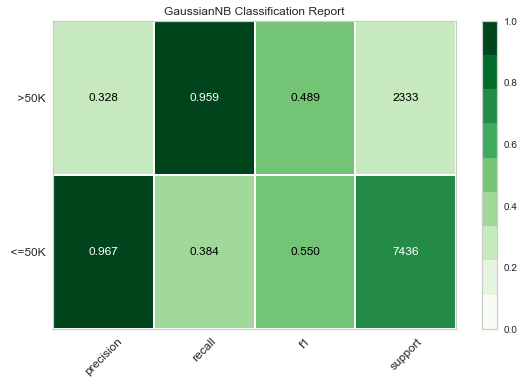

<AxesSubplot:title={'center':'GaussianNB Classification Report'}>

In [89]:
visualizer = ClassificationReport(gnb, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

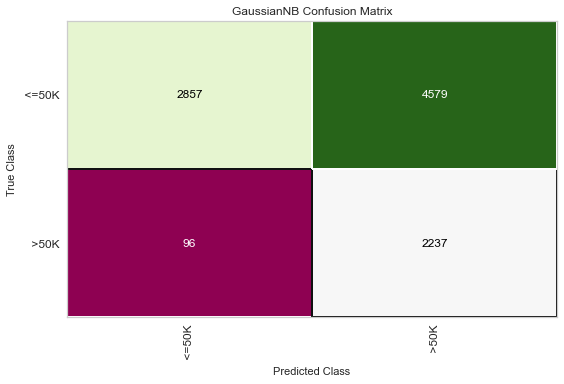

<AxesSubplot:title={'center':'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [90]:
visualizer = ConfusionMatrix(gnb, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

# Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier

#Created an obj for Random Forest
rand_for = RandomForestClassifier(n_jobs = None, max_depth = 25, min_samples_split = 5, random_state = 10, n_estimators= 200)
rand_for.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, min_samples_split=5, n_estimators=200,
                       random_state=10)

In [92]:
#Training Accuracy
rand_for.score(X_train, y_train)

0.930984555984556

In [93]:
#Testing Accuracy
y_train_pred = rand_for.predict(X_train)
y_test_pred = rand_for.predict(X_test) 
print(accuracy_score(y_test, y_test_pred))
print(accuracy_score(y_train, y_train_pred))

0.860067560651039
0.930984555984556


In [94]:
precision_positive = metrics.precision_score(y_test, y_test_pred, pos_label=' <=50K')
precision_positive

0.8830955687413206

In [95]:
precision_positive = metrics.precision_score(y_train, y_train_pred, pos_label=' <=50K')
precision_positive

0.9329291815927253

In [96]:
recall_specificity = metrics.recall_score(y_test, y_test_pred, pos_label=' <=50K')
recall_specificity

0.9406939214631522

In [97]:
recall_specificity = metrics.recall_score(y_train, y_train_pred, pos_label=' <=50K')
recall_specificity

0.9794029159916686

In [98]:
fbeta_score(y_train, y_train_pred, beta = 1, average = None)

array([0.95560134, 0.84510094])

In [99]:
fbeta_score(y_test, y_test_pred, beta = 1, average = None)

array([0.91098522, 0.67304473])

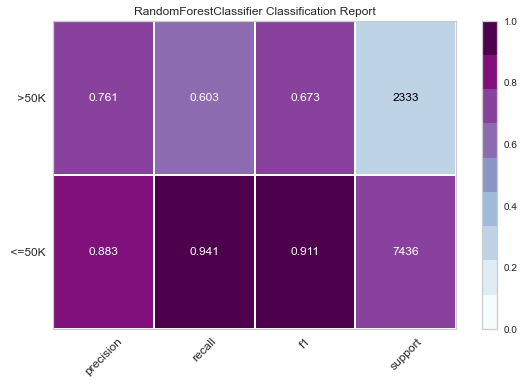

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [100]:
visualizer = ClassificationReport(rand_for, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

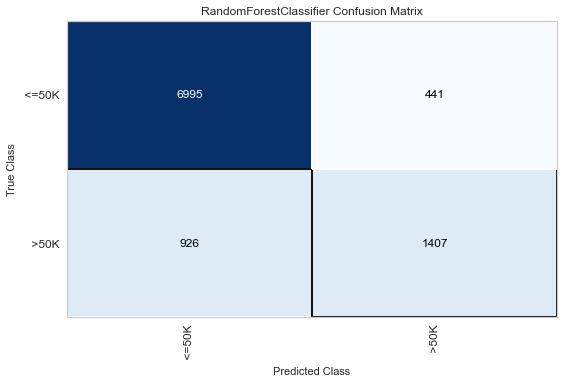

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [101]:
visualizer = ConfusionMatrix(rand_for, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

# K-Nearest Neighbors

In [102]:
from sklearn.neighbors import KNeighborsClassifier

#Created an obj for K - Nearest Neighbors
knc = KNeighborsClassifier(n_jobs = -1, n_neighbors = 6)
knc.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=6)

In [103]:
#Training Accuracy
knc.score(X_train, y_train)

0.874956124956125

In [104]:
#Testing Accuracy
y_train_pred = knc.predict(X_train)
y_test_pred = knc.predict(X_test)
print(accuracy_score(y_test, y_test_pred))
print(accuracy_score(y_train, y_train_pred))

0.8349882280683796
0.874956124956125


In [105]:
precision_positive = metrics.precision_score(y_test, y_test_pred, pos_label=' <=50K')
precision_positive

0.8646381167042324

In [106]:
precision_positive = metrics.precision_score(y_train, y_train_pred, pos_label=' <=50K')
precision_positive

0.8858945567319003

In [107]:
recall_specificity = metrics.recall_score(y_test, y_test_pred, pos_label=' <=50K')
recall_specificity

0.9285906401291016

In [108]:
recall_specificity = metrics.recall_score(y_train, y_train_pred, pos_label=' <=50K')
recall_specificity

0.9585744040731312

In [109]:
fbeta_score(y_train, y_train_pred, beta = 1, average = None)

array([0.92080253, 0.70306314])

In [110]:
fbeta_score(y_test, y_test_pred, beta = 1, average = None)

array([0.895474  , 0.60835763])

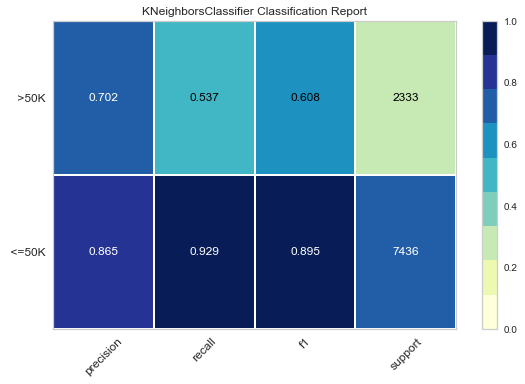

<AxesSubplot:title={'center':'KNeighborsClassifier Classification Report'}>

In [111]:
visualizer = ClassificationReport(knc, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show() 

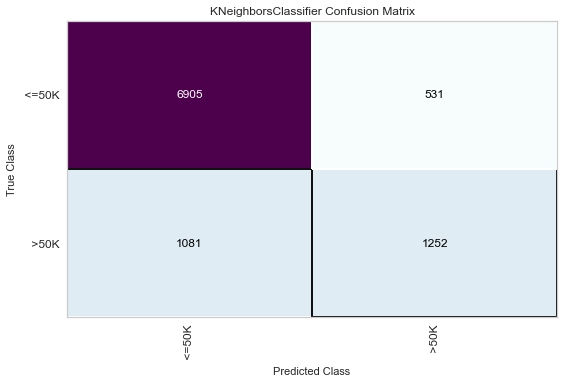

<AxesSubplot:title={'center':'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [112]:
visualizer = ConfusionMatrix(knc, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show() 

# Support Vector Machine

In [113]:
from sklearn.svm import SVC

#Created an obj for SVM
svm = SVC(C = 0.25, kernel = 'linear', random_state = 10)
svm.fit(X_train, y_train)

SVC(C=0.25, kernel='linear', random_state=10)

In [114]:
#Training Accuracy
svm.score(X_train, y_train)

0.853018603018603

In [115]:
#Testing Accuracy
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)
print(accuracy_score(y_test, y_test_pred))
print(accuracy_score(y_train, y_train_pred))

0.8495240045040434
0.853018603018603


In [116]:
precision_positive = metrics.precision_score(y_test, y_test_pred, pos_label=' <=50K')
precision_positive

0.8746546093946245

In [117]:
precision_positive = metrics.precision_score(y_train, y_train_pred, pos_label=' <=50K')
precision_positive

0.8774106175514627

In [118]:
recall_specificity = metrics.recall_score(y_test, y_test_pred, pos_label=' <=50K')
recall_specificity

0.9365250134480904

In [119]:
recall_specificity = metrics.recall_score(y_train, y_train_pred, pos_label=' <=50K')
recall_specificity

0.9371094654015274

In [120]:
fbeta_score(y_train, y_train_pred, beta = 1, average = None)

array([0.90627798, 0.65955285])

In [121]:
fbeta_score(y_test, y_test_pred, beta = 1, average = None)

array([0.90453306, 0.64492754])

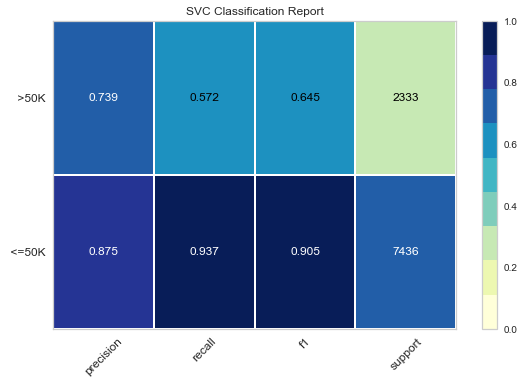

<AxesSubplot:title={'center':'SVC Classification Report'}>

In [122]:
visualizer = ClassificationReport(svm, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

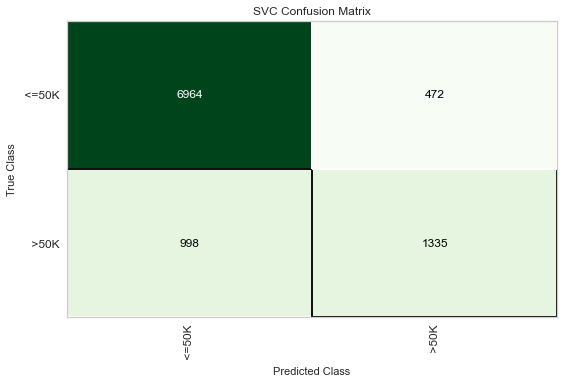

<AxesSubplot:title={'center':'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [123]:
visualizer = ConfusionMatrix(svm, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

# Stochastic Gradient Descent

In [124]:
from sklearn.linear_model import SGDClassifier

#Created an obj for SGD
sgd = SGDClassifier(loss = 'modified_huber', max_iter = 2000, shuffle = False, n_jobs = None, early_stopping = False, random_state = 10)
sgd.fit(X_train, y_train)

SGDClassifier(loss='modified_huber', max_iter=2000, random_state=10,
              shuffle=False)

In [125]:
#Training Accuracy
sgd.score(X_train, y_train)

0.8495963495963496

In [126]:
#Testing Accuracy
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)
print(accuracy_score(y_test, y_test_pred))
print(accuracy_score(y_train, y_train_pred))

0.8516736615825571
0.8536328536328537


In [127]:
precision_positive = metrics.precision_score(y_test, y_test_pred, pos_label=' <=50K')
precision_positive

0.8797412152733731

In [128]:
precision_positive = metrics.precision_score(y_train, y_train_pred, pos_label=' <=50K')
precision_positive

0.8816351099923389

In [129]:
recall_specificity = metrics.recall_score(y_test, y_test_pred, pos_label=' <=50K')
recall_specificity

0.9326250672404519

In [130]:
recall_specificity = metrics.recall_score(y_train, y_train_pred, pos_label=' <=50K')
recall_specificity

0.932133765332099

In [131]:
fbeta_score(y_train, y_train_pred, beta = 1, average = None)

array([0.90618145, 0.66726511])

In [132]:
fbeta_score(y_test, y_test_pred, beta = 1, average = None)

array([0.90541158, 0.65655369])

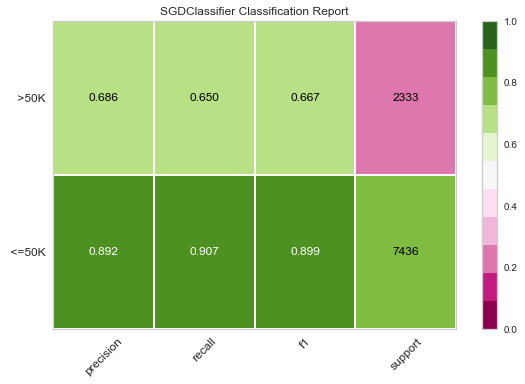

<AxesSubplot:title={'center':'SGDClassifier Classification Report'}>

In [133]:
visualizer = ClassificationReport(sgd, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

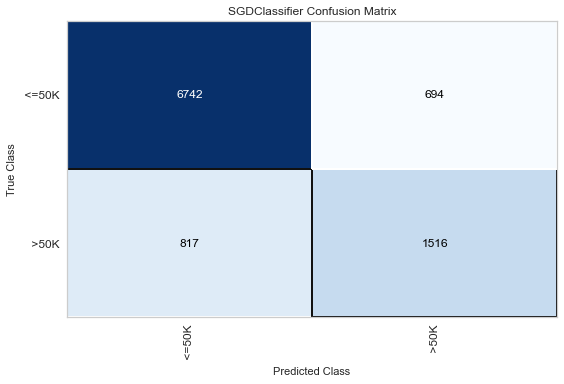

<AxesSubplot:title={'center':'SGDClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [134]:
visualizer = ConfusionMatrix(sgd, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

# Ada Boost

In [135]:
from sklearn.ensemble import AdaBoostClassifier

#Created an obj for Ada Boost
adab = AdaBoostClassifier(n_estimators = 200, learning_rate = 0.1 , random_state = 10)
adab.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=200, random_state=10)

In [136]:
#Training Accuracy
adab.score(X_train, y_train)

0.8569234819234819

In [137]:
#Testing Accuracy
y_train_pred = adab.predict(X_train)
y_test_pred = adab.predict(X_test)
print(accuracy_score(y_test, y_test_pred))
print(accuracy_score(y_train, y_train_pred))

0.8549493295117208
0.8569234819234819


In [138]:
precision_positive = metrics.precision_score(y_test, y_test_pred, pos_label=' <=50K')
precision_positive

0.8706737282916616

In [139]:
precision_positive = metrics.precision_score(y_train, y_train_pred, pos_label=' <=50K')
precision_positive

0.872615188393474

In [140]:
recall_specificity = metrics.recall_score(y_test, y_test_pred, pos_label=' <=50K')
recall_specificity

0.950645508337816

In [141]:
recall_specificity = metrics.recall_score(y_train, y_train_pred, pos_label=' <=50K')
recall_specificity

0.9500115713955103

In [142]:
fbeta_score(y_train, y_train_pred, beta = 1, average = None)

array([0.90967009, 0.65612148])

In [143]:
fbeta_score(y_test, y_test_pred, beta = 1, average = None)

array([0.90890389, 0.64423801])

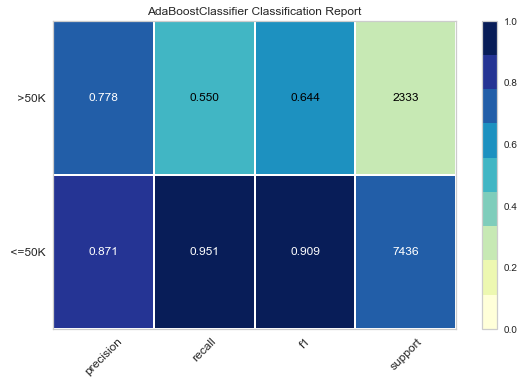

<AxesSubplot:title={'center':'AdaBoostClassifier Classification Report'}>

In [144]:
visualizer = ClassificationReport(adab, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

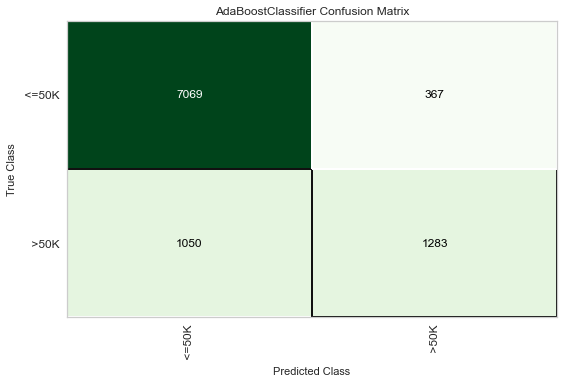

<AxesSubplot:title={'center':'AdaBoostClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [145]:
visualizer = ConfusionMatrix(adab, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

# Gradient Boosting

In [146]:
from sklearn.ensemble import GradientBoostingClassifier

#Created an obj for Gradient Boosting
gb = GradientBoostingClassifier( n_estimators = 200, learning_rate = 0.1 , random_state = 10)
gb.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200, random_state=10)

In [147]:
#Training Accuracy
gb.score(X_train, y_train)

0.8792558792558792

In [148]:
#Testing Accuracy
y_train_pred = gb.predict(X_train)
y_test_pred = gb.predict(X_test)
print(accuracy_score(y_test, y_test_pred))
print(accuracy_score(y_train, y_train_pred))

0.8650834271675709
0.8792558792558792


In [149]:
precision_positive = metrics.precision_score(y_test, y_test_pred, pos_label=' <=50K')
precision_positive

0.8860424028268551

In [150]:
precision_positive = metrics.precision_score(y_train, y_train_pred, pos_label=' <=50K')
precision_positive

0.8967889908256881

In [151]:
recall_specificity = metrics.recall_score(y_test, y_test_pred, pos_label=' <=50K')
recall_specificity

0.9441904249596558

In [152]:
recall_specificity = metrics.recall_score(y_train, y_train_pred, pos_label=' <=50K')
recall_specificity

0.9501272853506133

In [153]:
fbeta_score(y_train, y_train_pred, beta = 1, average = None)

array([0.92268794, 0.72446936])

In [154]:
fbeta_score(y_test, y_test_pred, beta = 1, average = None)

array([0.91419271, 0.68453806])

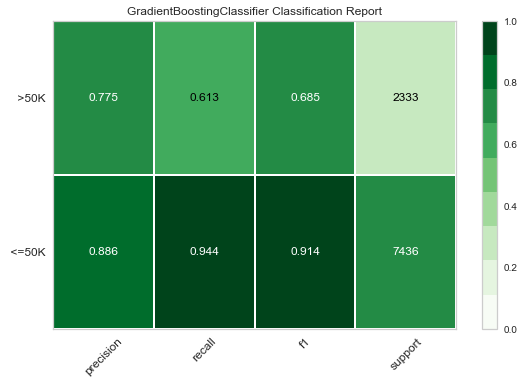

<AxesSubplot:title={'center':'GradientBoostingClassifier Classification Report'}>

In [155]:
visualizer = ClassificationReport(gb, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show() 

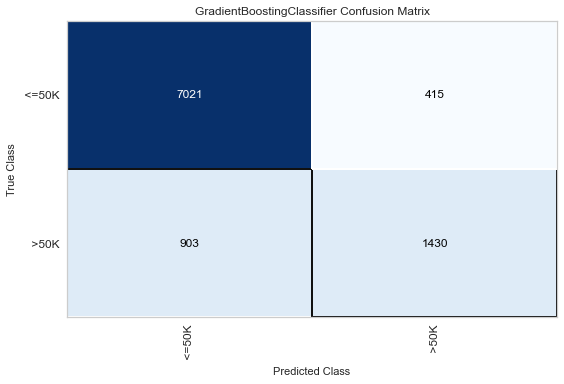

<AxesSubplot:title={'center':'GradientBoostingClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [156]:
visualizer = ConfusionMatrix(gb, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()